In [253]:
import glob
import os
import numpy as np
import random
from skimage.io import imread

from PIL import Image 
import cv2

import glob
import os

import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

import utilities

import matplotlib.pyplot as plt

In [226]:
# increase MAX pixel count 
Image.MAX_IMAGE_PIXELS = 1000000000
WINDOW_SIZE = (1024, 1024)

In [227]:
# Testing Pytorch dataset 
class HistoricalImagesDataset(Dataset):
    def __init__(self, data_paths:list, label_paths:list):
        # List of files 
        self.data_paths = data_paths
        self.label_paths = label_paths

    def __len__(self) -> int:
        # Lenght 
        return len(self.data_paths)

    # def resize(self, img:Image) -> Image: # done already
    #     '''Resizes the images to meet the smallest image size '''
    #     return img.resize((14445, 10917), Image.BICUBIC)

    def clahe_equalized(self, img:Image) -> np.array:
        ''' Apply CLAHE equalization'''
        np_img= np.asarray(img)
        clahe = cv2.createCLAHE(clipLimit = 5)
        return clahe.apply(np_img)

    def __getitem__(self, idx:int) -> torch.Tensor: 
        ''' Get individual data corresponding to the index in the data and label paths
        Returns:
        Tensor: specific data on index converted to Tensor'''
        # Image
        image = Image.open(self.data_paths[idx])
        # image = self.resize(image)
        # image = self.clahe_equalized(image)
        image = ToTensor()(image) # numpy array to a normalised tensor [0 to 1]

        # Labels 
        mask = Image.open(self.label_paths[idx])
        # mask = self.resize(mask)
        mask = ToTensor()(mask)

        return  image, mask

In [254]:
class HistoricalImagesDataset(Dataset):
    def __init__(self, data_paths:list, label_paths:list):
        # List of files 
        self.data_paths = data_paths
        self.label_paths = label_paths

    def __len__(self) -> int:
        # Lenght 
        return len(self.data_paths)

    def __getitem__(self, idx:int) -> torch.Tensor: 
        ''' Get individual data corresponding to the index in the data and label paths
        Returns:
        Tensor: specific data on index converted to Tensor'''
        # Image
        image = imread(self.data_paths[idx])
        image = ToTensor()(image) # numpy array to a normalised tensor [0 to 1]

        # Labels 
        mask = imread(self.label_paths[idx])
        mask = ToTensor()(mask)

        return  image, mask

In [229]:
PATCH_IMAGES = r'..\data\patches\images'
PATCH_MASK = r'..\data\patches\masks'

image_paths = glob.glob(PATCH_IMAGES +'\*')
mask_paths = glob.glob(PATCH_MASK + '\*')

print('Number of images:', len(image_paths),'\nNumber of masks:', len(mask_paths))

Number of images: 9410 
Number of masks: 9409


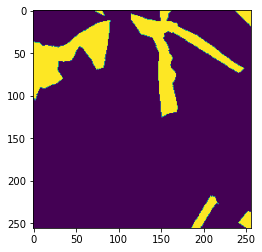

In [265]:
# Image.open(image_paths[8])
plt.imshow(imread(mask_paths[9000]))

In [231]:
# img_paths = []
# years = utilities.get_file_name(mask_paths)
# for year in years: 
#     if np.isin(year, utilities.get_file_name(image_paths)): 
#         img_paths.append(f'{IMAGES_PATH}\{year}.tif')
# print(years)

In [255]:
dataset = HistoricalImagesDataset(image_paths, mask_paths)
len(dataset) #???
# dataset.data_paths[0]
# img =  Image.open(dataset.data_paths[0])
# dataset.resize(img)

9410

In [256]:
data = next(iter(dataset))

In [257]:
np.unique(data[0])

array([0.], dtype=float32)

In [258]:
img = torch.squeeze(data[0])
mask = torch.squeeze(data[1])
# img[::10,::10*]

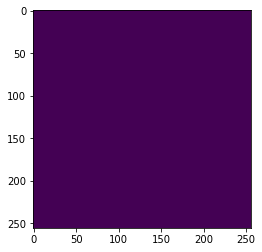

In [259]:
plt.imshow(img)

In [237]:
def plot_comparison(img1: np.array, img2: np.array, title: str, hist:bool=False):
    n_col = 2
    _, axs = plt.subplots(1, n_col, figsize=(20, 10))

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(title[0])

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title(title[1])
    plt.show()

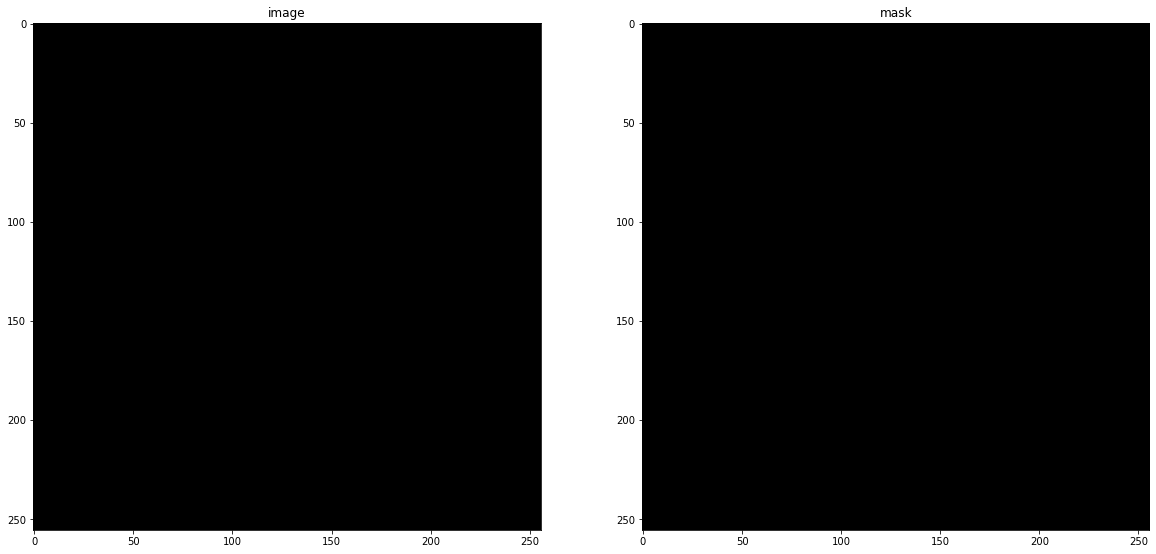

In [238]:
plot_comparison(img, mask, title=['image', 'mask'])

In [239]:
import numpy as np
from patchify import patchify, unpatchify

image = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

patches = patchify(image, (2,2), step=1) # split image into 2*3 small 2*2 patches.

assert patches.shape == (2, 3, 2, 2)
reconstructed_image = unpatchify(patches, image.shape)

In [240]:
image.shape

(3, 4)

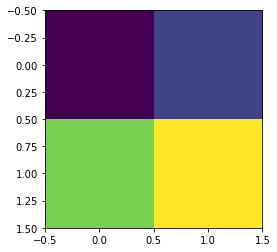

In [241]:
plt.imshow(patches[0][0])